In [1]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
import os
from math import exp , log, log10

In [2]:
os.chdir('../dependencies/')
from logistic_regression import logistic_regression

In [3]:
def loss(f_x,y):
    if y == 1 : return y*log(abs(f_x))
    else : return (1-y)*log(abs(1-f_x))
    

In [4]:
def plot_graph(name,var):
    figure = graph.figure(figsize = (15,10))
    graph.ylabel(name)
    graph.xlabel("Iterations")
    graph.title(name)
    graph.plot(var,label=name)
    graph.legend()
    graph.grid(True)
    

In [5]:
def norm(vector):
    vector = [v**2 for v in vector]
    vector = float(sum(vector))
    vector = vector ** 0.5
    return vector

# def sigmoid(x,w):
#     f_x = 1/(1 + exp(-float(maths.matmul(w.T,x)))) 
#     return f_x

def logit(f_x):
    if f_x == 1: return 0
    if f_x == 0: return 1
    else : return log(abs(f_x)/abs(1-f_x))

In [6]:
def create_confusion_matrix(y,y_hat):
    """ Creating the confusion matrix """

    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y)):
        if y[i] == y_hat[i] == 1:
            tp = tp + 1
        elif y[i] == y_hat[i] == 0:
            tn = tn + 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn = fn + 1
        else :
            fp = fp + 1

    confusion_matrix = {'tp':tp,'tn':tn,'fp':fp,'fn':fn}
    print("Confusion Matrix : ",confusion_matrix)
    accuracy = round((confusion_matrix['tp']+confusion_matrix['tn'])/(confusion_matrix['tp'] + confusion_matrix['tn'] + confusion_matrix['fp'] + confusion_matrix['fn'])*100,2)
    precision = round((confusion_matrix['tp'])/(confusion_matrix['fp']+confusion_matrix['tp'])*100,2) 
    sensitivity = round((confusion_matrix['tp'])/(confusion_matrix['tp']+confusion_matrix['fn'])*100,2)
    specificity = round((confusion_matrix['tn'])/(confusion_matrix['fp']+confusion_matrix['tn'])*100,2)

    
    print('Accuracy : ', accuracy)
    print('Precision : ', precision)
    print('Senstivity : ', sensitivity)
    print('Specificity : ', specificity)
    
#     accuracy = find_accuracy()
#     precision = find_precision()
#     sensitivity = find_sensitivity()
#     specificity = find_specificity()
#     fscore = find_fscore()


def find_precision(show = True):
    """ Finding Precision """

    confusion_matrix = confusion_matrix
    precision = round((confusion_matrix['tp'])/(confusion_matrix['fp']+confusion_matrix['tp'])*100,2) 
    if show : print("Precision : ",precision,"%")
    return precision

def find_accuracy(show = True):
    """ Finding Accuracy """

    confusion_matrix = confusion_matrix
    accuracy = round((confusion_matrix['tp']+confusion_matrix['tn'])/(confusion_matrix['tp'] + confusion_matrix['tn'] + confusion_matrix['fp'] + confusion_matrix['fn'])*100,2)
    if show : print("Accuracy : ",accuracy,"%")
    return accuracy

def find_sensitivity(show = True):
    """ Finding Sensivity """

    confusion_matrix = confusion_matrix
    sensitivity = round((confusion_matrix['tp'])/(confusion_matrix['tp']+confusion_matrix['fn'])*100,2)
    if show : print("Sensivity : ",sensitivity,"%")
    return sensitivity

def find_specificity(show = True):
    """ Finding Specificity """

    confusion_matrix = confusion_matrix
    specificity = round((confusion_matrix['tn'])/(confusion_matrix['fp']+confusion_matrix['tn'])*100,2)
    if show : print("Specificity : ",specificity,"%")
    return specificity

def find_fscore(show=True):
    """ Finding FScore """

    confusion_matrix = confusion_matrix
    f_score = round(2/((1/find_precision(False))+(1/find_sensitivity(False))),2)
    if show : print("F1 Score : ",f_score)
    return f_score        


In [7]:
filename = 'data3'
validation_perc = 0.7
training_perc = 0.8
alphas = maths.arange(0,1,0.1)
number_of_iterations = 10
training_perc = 0.7

In [8]:
log_reg = logistic_regression()
log_reg.load_data(filename)
df_validation, df_test = log_reg.split_dataset(validation_perc , training_perc)
# log_reg.find_weights(alphas, number_of_iterations )
# log_reg.classify(df_test)

In [9]:
df_validation = df_validation.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
for col in df_validation.columns[1:-1] :
    maximum = max(df_validation[col])
    minimum = min(df_validation[col])
    diff = maximum - minimum
    
    df_validation[col] = (df_validation[col] - maximum) / diff
    df_test[col] = (df_test[col] - maximum) / diff
df_validation

,x0,x1,x2,y
0,1,-0.756527,-0.751738,1
1,1,-0.207527,-0.342348,0
2,1,-0.725768,-0.661625,1
3,1,-0.713645,-0.839598,1
4,1,-0.292763,-0.324568,0
...,...,...,...,...
135,1,-0.661613,-0.708658,1
136,1,-0.215439,-0.347867,0
137,1,-0.306533,-0.436580,0
138,1,-0.316729,-0.270946,0


In [11]:
def sigmoid(x,w):
    return 1/(1 + exp(-float(w.T@x)))

In [12]:
def liklihood(x,y,w):
    y_hat = sigmoid(x,w)
    if y_hat == 1: return y*log(y_hat)
    else : return y*log(abs(y_hat)) + (1-y)*log(abs(1-y_hat))

In [13]:
def norm(z):
    z = list(z)
    return float(sum([z**2 for z in z]))**0.5

In [14]:
def logit(x,w):
    f_x = sigmoid(x,w)
    if f_x == 1 : return 1
    elif f_x == 0 : return 0 
    else : return log(abs(f_x/(1-f_x)))
    

In [15]:
df_validation = df_validation.sample(frac=1)
X = df_validation.iloc[:,:-1].reset_index(drop=True)
Y = df_validation.iloc[:,-1].reset_index(drop=True)

epsilon = 1e-3
diff_eps = 1e-7
w_stars = {}
meta_norms = {}
meta_liklihoods = {}
alphas = [0.1]

for alpha in alphas:
    w_star = maths.matrix(maths.random.rand(X.shape[1])).T
    
    w_old = w_star + [1]
    
    
    # epsilon = 1e-3
    # alpha = 0.1
    liklihoods = []
    # sigmoids = []
    weights = []
    norms = [1000,100]
    differential = 1
    iteration = 0 
    
    # while norm(w_star - w_old) > epsilon and differential > diff_eps:
    while (norms[iteration]/norms[iteration+1] - 1) > epsilon :
        iteration = iteration + 1
        
        w_old = w_star
        loss = []
    
        for i in range(len(X)):
            x = maths.matrix(X.iloc[i]).T
            y = Y.iloc[i]
            y_hat = sigmoid(x,w_star)
            w_star = w_star + alpha * (y - y_hat) * x
            loss.append(liklihood(x,y,w_star))
        
        weights.append(w_star.T)
        # sigmoids.append(y_hat)
        norms.append(norm( w_star - w_old ))
        if len(norms) > 2:
            differential = norms[-2] - norms[-1]
        liklihoods.append(sum(loss))

    w_stars.update({epsilon:w_star})
    meta_norms.update({epsilon:norms})
    meta_liklihoods.update({epsilon:liklihoods})
    
    print(w_star)
print(len(norms))

[[-16.3527683 ]
 [-19.43934264]
 [-13.7411936 ]]
839


(array([838.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([7.60994786e-03, 1.00006849e+02, 2.00006088e+02, 3.00005327e+02,
        4.00004566e+02, 5.00003805e+02, 6.00003044e+02, 7.00002283e+02,
        8.00001522e+02, 9.00000761e+02, 1.00000000e+03]),
 <BarContainer object of 10 artists>)

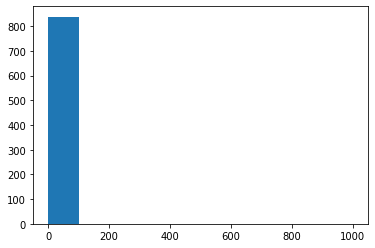

In [16]:
graph.hist(norms)

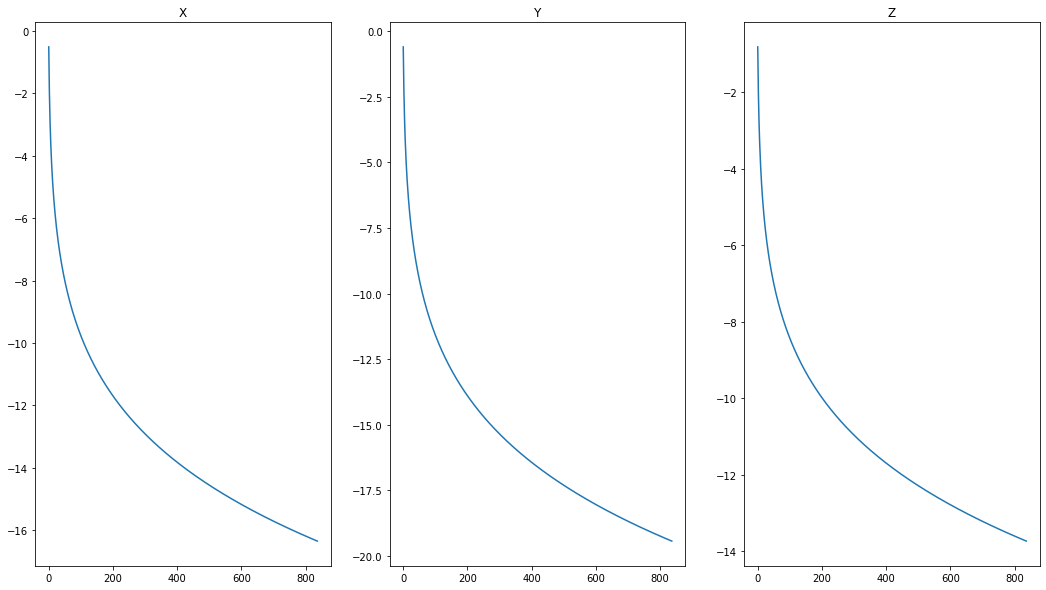

In [17]:
x = [float(weight.T[0]) for weight in weights]
y = [float(weight.T[1]) for weight in weights]
z = [float(weight.T[2]) for weight in weights]

figure = graph.figure(figsize=(18,10))

graph.subplot(1,3,1)
graph.plot(x)
graph.title('X')

graph.subplot(1,3,2)
graph.plot(y)
graph.title('Y')

graph.subplot(1,3,3)
graph.plot(z)
graph.title('Z')

graph.show()

In [18]:
liklihoods[-1] == max(liklihoods)

True

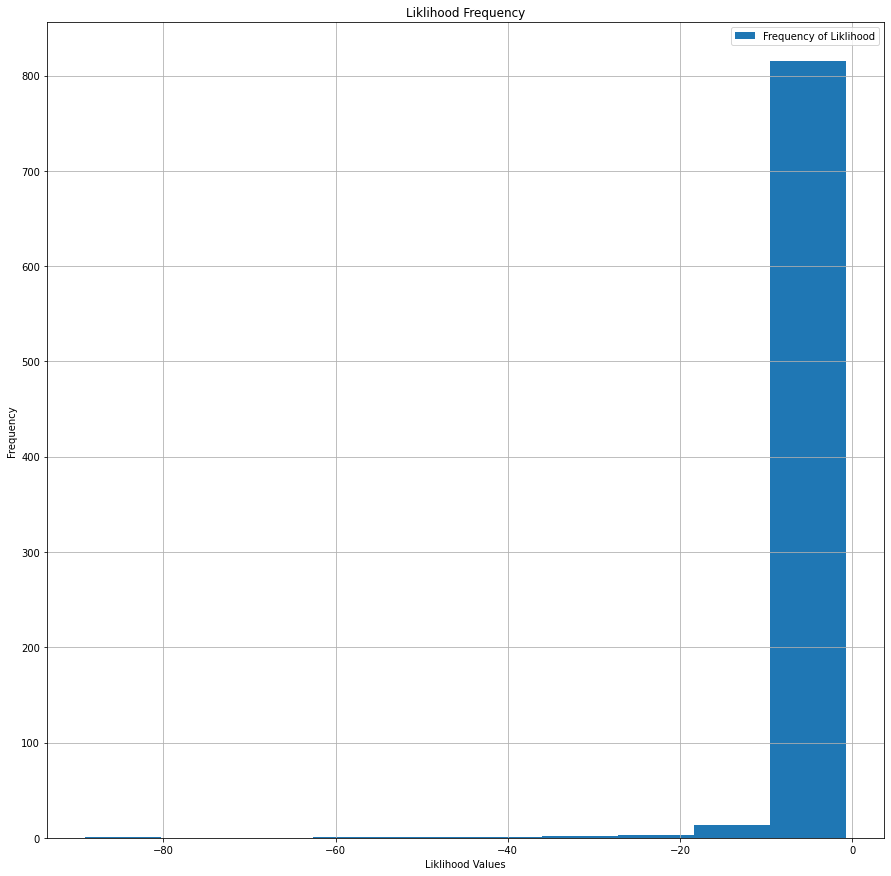

In [19]:
figure = graph.figure(figsize=(15,15))
graph.hist(liklihoods,label = 'Frequency of Liklihood')
graph.legend()
graph.title("Liklihood Frequency")
graph.grid()
graph.xlabel("Liklihood Values")
graph.ylabel("Frequency")
graph.show()

In [20]:
# figure = graph.figure(figsize=(15,15))
# graph.scatter(sigmoids,liklihoods,c = 'blue',label = 'Liklihood',alpha = 0.1)
# graph.legend()
# graph.title("Liklihood vs Sigmoid")
# graph.grid()
# graph.xlabel("Sigmoid")
# graph.ylabel("Liklihood")
# graph.show()

-0.7214441560448906


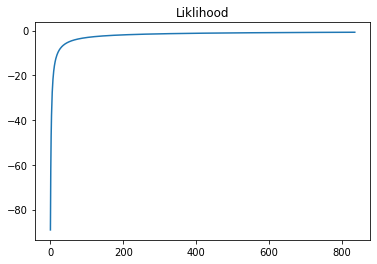

In [21]:
graph.title("Liklihood")
graph.plot(liklihoods)
print(max(liklihoods))

0.007609947862984265


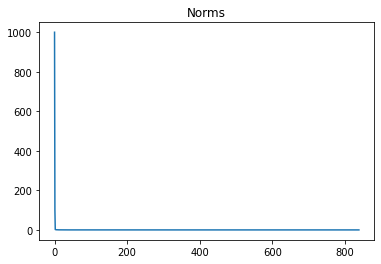

In [22]:
graph.title("Norms")
graph.plot(norms)
print(min(norms))

In [23]:
threshold = 0.5

In [24]:
X = df_test.iloc[:,:-1]
Y = df_test.iloc[:,-1]
y_hat = []
dbs = []

for i in range(len(df_test)):
    x = X.iloc[i]
    y = Y.iloc[i]
    y_hat.append(logit(x,w_star))
    # dbs.append(w_star.T@x)

y_hat = [1 if y > threshold else 0 for y in y_hat]
df_test['y_hat'] = y_hat

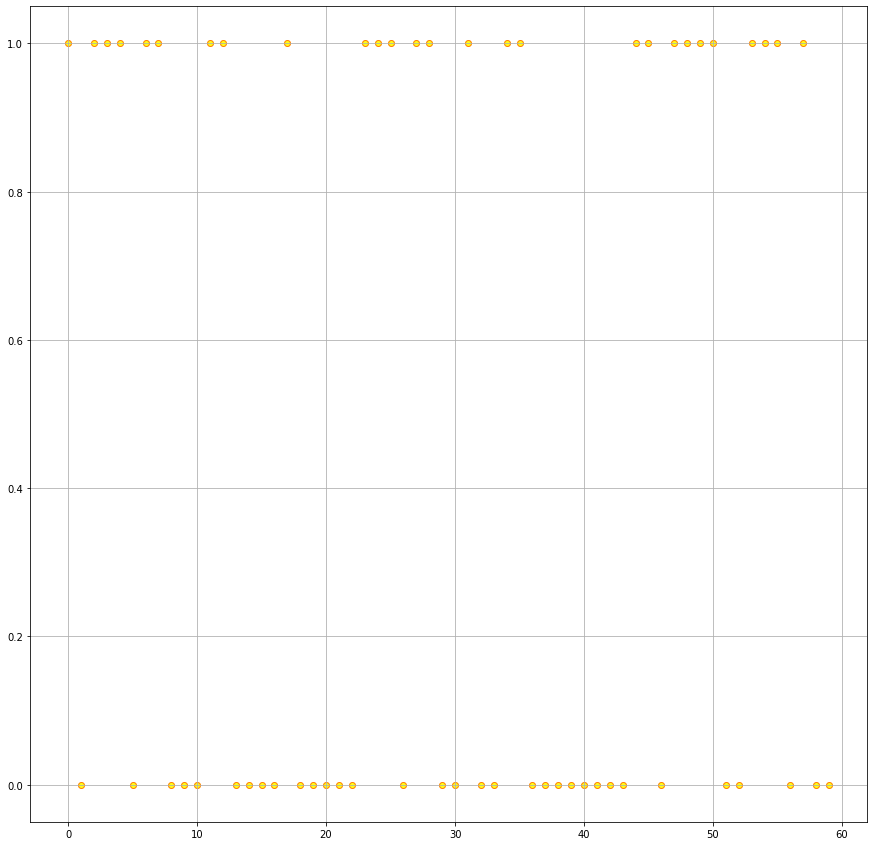

In [25]:
figure = graph.figure(figsize=(15,15))
graph.scatter([i for i in range(len(df_test['y']))],df_test['y'],alpha = 0.8,color = 'yellow')
graph.scatter([i for i in range(len(df_test['y_hat']))],df_test['y_hat'], alpha = 0.5, edgecolor = 'red',color = 'yellow')
graph.grid(True)
# graph.plot(dbs)

In [26]:
w_star

matrix([[-16.3527683 ],
        [-19.43934264],
        [-13.7411936 ]])

In [27]:
create_confusion_matrix(df_test['y'],df_test['y_hat'])

Confusion Matrix :  {'tp': 27, 'tn': 33, 'fp': 0, 'fn': 0}
Accuracy :  100.0
Precision :  100.0
Senstivity :  100.0
Specificity :  100.0


In [28]:
norms_copy = norms.copy()

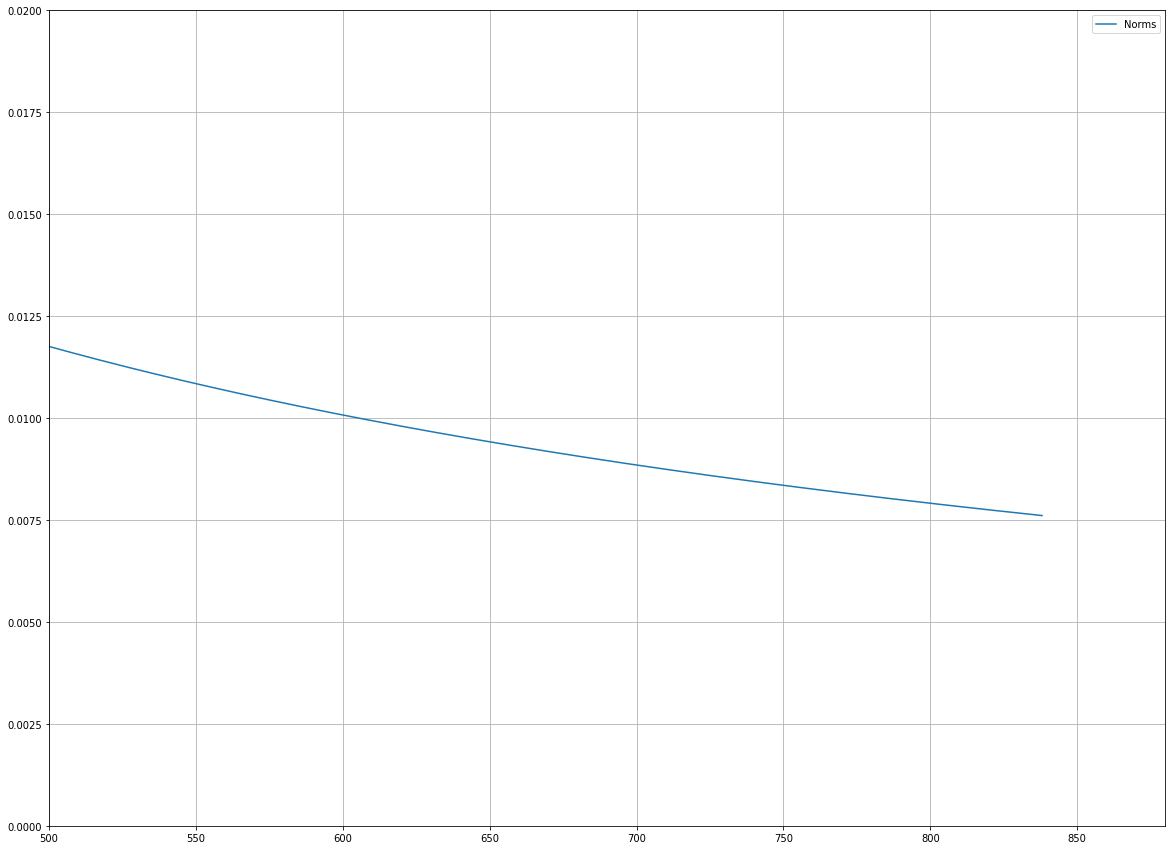

In [29]:
figure = graph.figure(figsize=(20,15))
graph.plot(norms,label = 'Norms')
# graph.scatter(norms.index(maths.median(norms)),maths.median(norms),color = 'red', marker = 'x' , label = 'Median')
# graph.scatter(norms.index(maths.mean(norms)),maths.mean(norms),color = 'red', marker = 'x' , label = 'Mean')
graph.grid(True)
graph.legend()
graph.xlim(500)
graph.ylim(0,0.020)
graph.show()
graph.ion()

In [30]:
k_norms = [i for i in norms if i > epsilon]

In [31]:
len(k_norms)

839

(0.0, 0.0001)

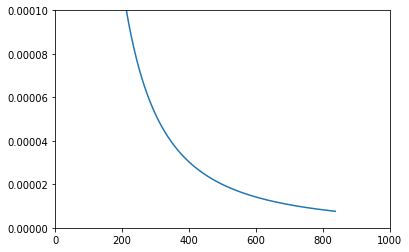

In [32]:
diff = []
for i in range(len(k_norms)-1):
    diff.append(k_norms[i]-k_norms[i+1])
graph.plot(diff)
graph.xlim(0,1000)
graph.ylim(0,0.0001)
# graph.show()
# graph.ion()

In [33]:
df_test.head()

,x0,x1,x2,y,y_hat
0,1,-0.632025,-0.681232,1,1
1,1,-0.279171,-0.432208,0,0
2,1,-0.668360,-0.727224,1,1
3,1,-0.744781,-0.746703,1,1
4,1,-0.743521,-0.822708,1,1


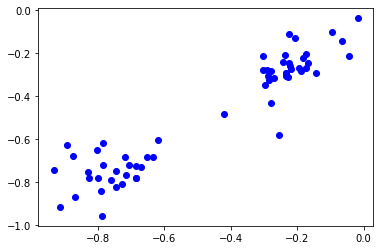

In [34]:
graph.scatter(df_test['x1'],df_test['x2'],c = 'blue')
# graph.plot(df_test.iloc[:,:3] @ w_star)
# graph.xlabel('x1')
# graph.ylabel('x2')


In [35]:
i = 0

In [36]:
k_norms[i] / k_norms[i+1]

10.0

In [37]:
i = 0
while (norms[i]/norms[i+1] - 1) > 0.0001: i = i+1
print(i)

IndexError: list index out of range